In [130]:
#Linear Regression Experiment
#Estimate life expectancy given demographic info
##  Source: Lab 4.8 from Edx DAT210X  ##

#setup

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty


def drawLine(model, X, X_train, Y_train, X_test, Y_test, title):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    
    #plot training points
    ax.scatter(X_train, Y_train, c='b', marker='o')
    #plot test points
    ax.scatter(X_test, Y_test, c='g', marker='o')
    #plot model
    ax.plot(X, model.predict(X), color='orange', linewidth=1, alpha=0.7)   
    
    #Print Predictions
    print( "Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print ("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print ("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])
    
    #Print title
    score = model.score(X_test, Y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

In [131]:
#Load the Data

X = pd.read_csv("life_expectancy.csv", delim_whitespace = True)
X.head()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [132]:
#Filter out 1900 - 1975 
X = X[X.Year > 1979]

In [133]:
# import model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [134]:
# Setup X_train and Y_train, X_test and Y_test, using 2005 as boundry

Demographic = "WhiteFemale"

X_train = X[X.Year < 2005]
Y_train = X_train[[Demographic]]
X_train = X_train[["Year"]]

X_test = X[X.Year > 2004]
Y_test = X_test[[Demographic]]
X_test = X_test[["Year"]]

Y = X[[Demographic]]
X = X[["Year"]]

Est 2014 Model trained on WhiteFemale<2000 Life Expectancy:  [ 81.24]
Est 2030 Model trained on WhiteFemale<2000 Life Expectancy:  [ 82.584]
Est 2045 Model trained on WhiteFemale<2000 Life Expectancy:  [ 83.844]


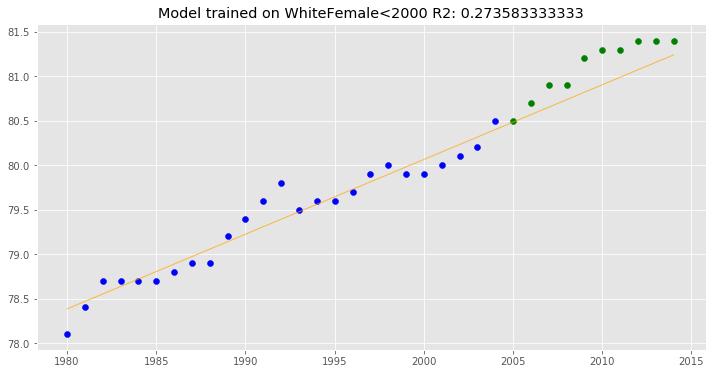

In [135]:
#train the model, map it, and make predictions
Trained_model = model.fit(X_train, Y_train)
drawLine(Trained_model, X, X_train, Y_train, X_test, Y_test, "Model trained on " + Demographic + "<2000")